# Predicting diabetes with a simple neural network using Keras

In [1]:
import h5py as h5
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy
import os
from keras.utils.vis_utils import plot_model
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [4]:
data = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
data.shape

(768, 9)

In [5]:
a = int(len(data)*0.3)
numpy.random.shuffle(data)
X_train = data[a:, :8]
Y_train = data[a:, 8]
X_test = data[:a, :8]
Y_test = data[:a, 8]

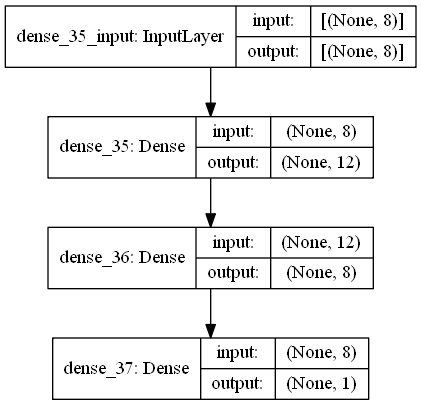

In [55]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [60]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
h = model.fit(X_train, Y_train, epochs=150, validation_data=(X_test, Y_test), batch_size=40, verbose=0)
# evaluate the model
scores = model.evaluate(X_test, Y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

8/8 [==============================] - 0s 2ms/step - loss: 0.5803 - accuracy: 0.7217
accuracy: 72.17%


In [61]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


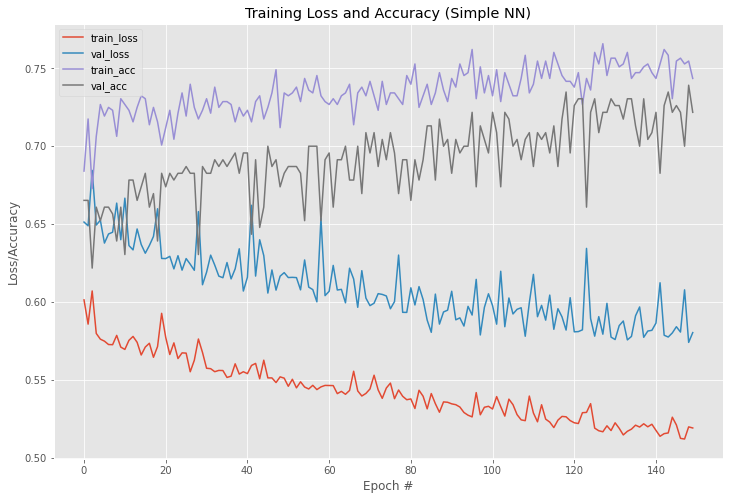

In [63]:
# plot the training loss and accuracy
plt.rcParams["figure.figsize"] = (12,8)
N = numpy.arange(0, 150)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, h.history["loss"], label="train_loss")
plt.plot(N, h.history["val_loss"], label="val_loss")
plt.plot(N, h.history['accuracy'], label="train_acc")
plt.plot(N, h.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

# The End